In [1]:
import pandas as pd
import numpy as np

np.random.seed(1)

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from datetime import datetime
#from keras import tensorflow as tf
import tensorflow as tf

In [1]:
f_name = '../data/all_data_s.npy'

np_input_full = np.array(np.load(f_name)).astype(np.float32)

NameError: name 'np' is not defined

In [63]:
#np_input=np_input_full[0:1000,:]    this does not work?
np_input=np_input_full

array([[1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 6.4170933e+00,
        6.6718588e+00, 6.2894907e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 1.2834187e+01,
        1.3343718e+01, 1.2578981e+01],
       ...,
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 2.2410522e-06,
        9.1374312e-07, 3.1065125e-07],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 2.3655543e-06,
        9.6450708e-07, 3.2791024e-07],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 2.4900562e-06,
        1.0152711e-06, 3.4516927e-07]], dtype=float32)

In [65]:
"""xs_node = np_data_train[:,0:768]
xs_reshape = tf.reshape(xs_node, shape=[-1,height,width,3])
xs_load = np_data_train[:,768:770]
ys = np_data_train[:,770:1538]"""

X=np_input[:,0:768]
y=np_input[:,770:1538]

a=X
b=y

img_rows=24
img_cols=32

X=np.array([row.reshape(img_rows,img_cols) for row in X])
#y=np.array([row.reshape(img_rows,img_cols) for row in y])

#X_train2 = X_train1.reshape(X_train1.shape[0], img_rows, img_cols,3)
#y_train2 = y_train1.reshape(y_train1.shape[0], img_rows, img_cols,3)
"""
X_train_df=pd.DataFrame(X_train1)
y_train_df=pd.DataFrame(y_train1)

# Check the data
X_train.isnull().any().describe()

# Normalize the data
X_train = X_train / 255.0
test = test / 255.0"""

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 5, random_state=1)
#A_train, A_val, b_train, b_val = train_test_split(a, b, test_size = 5, random_state=1)


(995, 24, 32)

In [12]:
#Default dimensions we found online
img_width, img_height = 224, 224

"""#Create a bottleneck file
top_model_weights_path = 'bottleneck_fc_model.h5'
# loading up our datasets
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
test_data_dir = 'data/test'
"""
# number of epochs to train top model
epochs = 7 #this has been changed after multiple model run
# batch size used by flow_from_directory and predict_generator
batch_size = 50

In [39]:

model = Sequential([

    # First Convolutional Block
    Conv2D(filters=5, kernel_size=3, activation="relu", padding='same',
                  # give the input dimensions in the first layer
                  # [height, width, color channels(RGB)]
                  input_shape=[img_rows,img_cols, 1]),   #(120950, 24, 32)
    MaxPool2D(),

    # Second Convolutional Block
    Conv2D(filters=5, kernel_size=3, activation="relu", padding='same'),
    MaxPool2D(),

    # Third Convolutional Block
    Conv2D(filters=5, kernel_size=3, activation="relu", padding='same'),
    MaxPool2D(),

    # Classifier Head
    Flatten(),
    Dense(units=300, activation="relu"),
    Dense(units=768, activation="relu"),
])
model.summary()



"""
model = Sequential([

    # First Convolutional Block
    Conv2D(filters=32, kernel_size=5, activation="relu", padding='same',
                  # give the input dimensions in the first layer
                  # [height, width, color channels(RGB)]
                  input_shape=[img_rows,img_cols, 1]),   #(120950, 24, 32)
    MaxPool2D(),

    # Second Convolutional Block
    Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    MaxPool2D(),

    # Third Convolutional Block
    Conv2D(filters=20, kernel_size=3, activation="relu", padding='same'),
    MaxPool2D(),

    # Classifier Head
    Flatten(),
    Dense(units=500, activation="relu"),
    Dense(units=768, activation="relu"),
])
model.summary()"""



"""#This is the best model we found. For additional models, check out I_notebook.ipynb
start = datetime.now()
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(300, activation=LeakyReLU(alpha=0.3)))
model.add(Dropout(0.5))
model.add(Dense(200, activation=LeakyReLU(alpha=0.3)))
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.compile(loss='categorical_crossentropy',
   optimizer='adam',
   metrics=['acc'])
history = model.fit(X_train, y_train,
   epochs=7,
   batch_size=batch_size,
   validation_data=(X_val, y_val))
#model.save_weights(top_model_weights_path)
(eval_loss, eval_accuracy) = model.evaluate(
    X_val, y_val, batch_size=batch_size,     verbose=1)
#print(“[INFO] accuracy: {:.2f}%”.format(eval_accuracy * 100))
#print(“[INFO] Loss: {}”.format(eval_loss))
end= datetime.now()
elapsed= end-start
print ('Time: ', elapsed)"""

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 32, 5)         50        
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 16, 5)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 16, 5)         230       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 8, 5)          0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 8, 5)           230       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 3, 4, 5)         

"#This is the best model we found. For additional models, check out I_notebook.ipynb\nstart = datetime.now()\nmodel = Sequential()\nmodel.add(Flatten(input_shape=X_train.shape[1:]))\nmodel.add(Dense(300, activation=LeakyReLU(alpha=0.3)))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(200, activation=LeakyReLU(alpha=0.3)))\nmodel.add(Dropout(0.3))\nmodel.add(Dense(100,activation='relu'))\nmodel.compile(loss='categorical_crossentropy',\n   optimizer='adam',\n   metrics=['acc'])\nhistory = model.fit(X_train, y_train,\n   epochs=7,\n   batch_size=batch_size,\n   validation_data=(X_val, y_val))\n#model.save_weights(top_model_weights_path)\n(eval_loss, eval_accuracy) = model.evaluate(\n    X_val, y_val, batch_size=batch_size,     verbose=1)\n#print(“[INFO] accuracy: {:.2f}%”.format(eval_accuracy * 100))\n#print(“[INFO] Loss: {}”.format(eval_loss))\nend= datetime.now()\nelapsed= end-start\nprint ('Time: ', elapsed)"

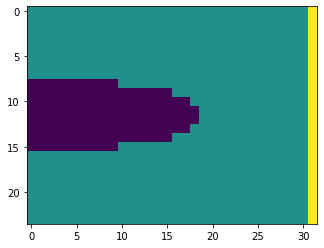

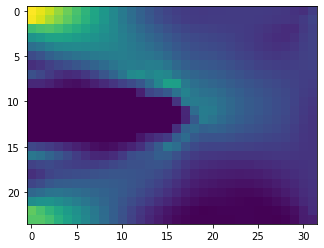

(120955, 24, 32)

In [57]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(X_train[50], interpolation='nearest')
plt.show()

%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(y_train[50], interpolation='nearest')
plt.show()

X_train.shape

In [101]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='mean_squared_error',
    metrics=['mean_squared_error']
)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val,y_val),   #X_val
    epochs=40,
    verbose=1,
)


Epoch 1/40
1253/3780 [========>.....................] - ETA: 20s - loss: 6265.2349 - mean_squared_error: 6265.2349

KeyboardInterrupt: 

In [148]:
X_train.shape

(120950, 24, 32)

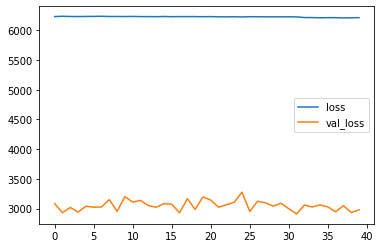

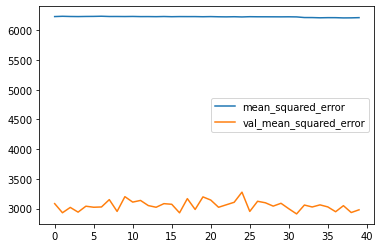

In [48]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['mean_squared_error', 'val_mean_squared_error']].plot();

In [96]:
#X_train, X_val, b_train, b_val

range(predRowStart,predRowFin)

predictions

array([[316.38498 , 319.48706 , 321.86914 , ...,  49.03993 ,  61.759224,
         61.35297 ],
       [ 69.35486 ,  62.235874,  37.36339 , ...,   0.      ,   0.      ,
          0.      ],
       [285.77414 , 284.41498 , 279.57202 , ...,   0.      ,   0.      ,
          0.      ],
       [253.66478 , 242.94919 , 229.14607 , ...,  51.196842,  62.498466,
         61.693565],
       [ 71.00115 ,  44.733162,   0.      , ...,   0.      ,   0.      ,
          0.      ]], dtype=float32)

In [111]:
predRowStart=0
predRowFin=20
predictions=model.predict(
    #X_val[0:10],
    X_val[predRowStart:predRowFin],
    verbose=2
)

1/1 - 0s - 16ms/epoch - 16ms/step


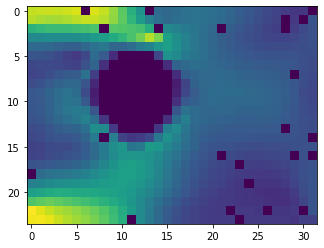

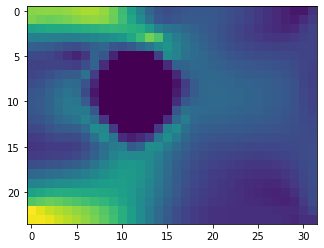

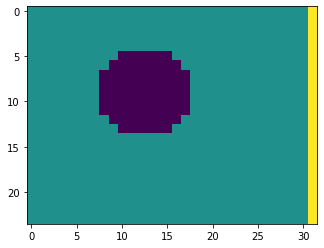

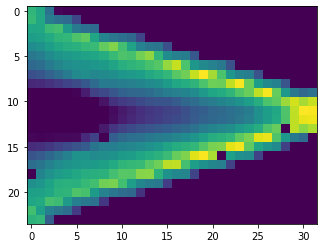

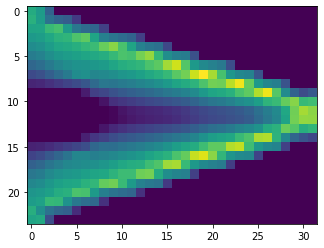

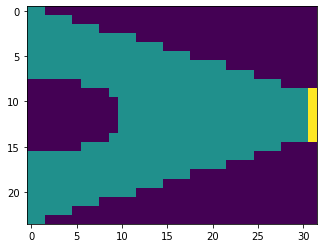

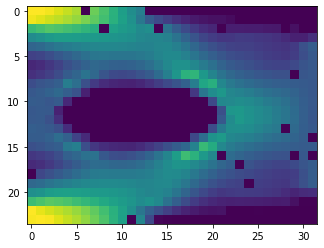

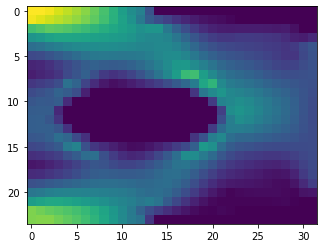

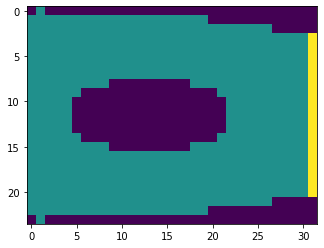

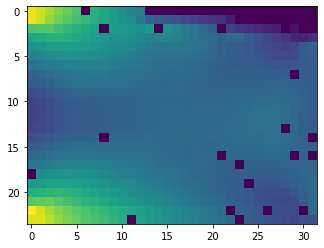

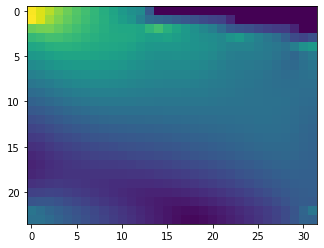

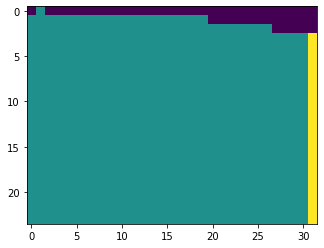

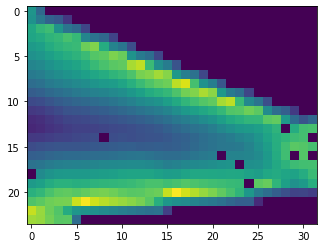

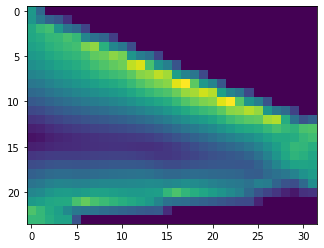

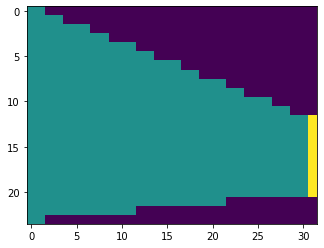

IndexError: index 5 is out of bounds for axis 0 with size 5

In [110]:
%matplotlib inline
from matplotlib import pyplot as plt

predic=np.array([row.reshape(img_rows,img_cols) for row in predictions])
trueVal=np.array([row.reshape(img_rows,img_cols) for row in y_val])

for row in range(predRowStart,predRowFin):
    plt.imshow(predic[row], interpolation='nearest')
    plt.show()

    plt.imshow(trueVal[row], interpolation='nearest')
    plt.show()

    plt.imshow(X_val[row], interpolation='nearest')
    plt.show()

#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 5, random_state=1) d


In [ ]:
input Shape
You always have to give a 4D array as input to the CNN. So input data has a shape of (batch_size, height, width, depth), where the first dimension represents the batch size of the image and the other three dimensions represent dimensions of the image which are height, width, and depth. For some of you who are wondering what is the depth of the image, it’s nothing but the number of color channels. For example, an RGB image would have a depth of 3, and the greyscale image would have a depth of 1.

Output Shape
The output of the CNN is also a 4D array. Where batch size would be the same as input batch size but the other 3 dimensions of the image might change depending upon the values of filter, kernel size, and padding we use.


You always have to feed a 4D array of shape (batch_size, height, width, depth) to the CNN.
Output data from CNN is also a 4D array of shape (batch_size, height, width, depth).
To add a Dense layer on top of the CNN layer, we have to change the 4D output of CNN to 2D using a Flatten layer.